
# Author Recommendation System

This project is an Author Similarity Recommendation System that suggests similar authors. It uses a dataset of books and authors to create recommendations using cosine similarity.

Dataset: https://statso.io/book-recommendations-case-study/

Example Solution: https://thecleverprogrammer.com/2023/10/30/book-recommendation-system-with-python/

Hugging Face: https://huggingface.co/spaces/alperugurcan/author-recommendation

In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


In [2]:

df = pd.read_csv("books_data.csv")
df.head()

,bookID,title,authors,average_rating
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78


## 1. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bookID          11127 non-null  int64 
 1   title           11127 non-null  object
 2   authors         11127 non-null  object
 3   average_rating  11127 non-null  object
dtypes: int64(1), object(3)
memory usage: 347.8+ KB


In [4]:
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce') # Convert to numeric
# 4 rows with NaN values

In [5]:
df.dropna(inplace=True) # Drop NaN values

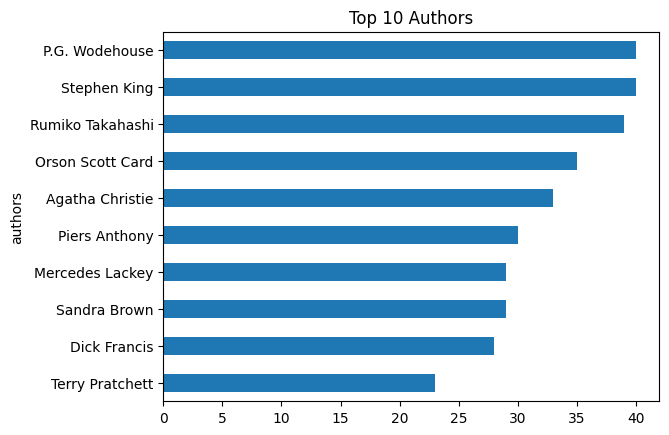

In [6]:
# Most book written authors
df['authors'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', title='Top 10 Authors');

In [7]:
# Total book count and average rating for authors
author_stats = df.groupby('authors').agg(
    book_count=('average_rating', np.size),
    average_rating=('average_rating', np.mean)
).reset_index()

author_stats.head(10)

C:\Users\alperugurcan\AppData\Local\Temp\ipykernel_8896\3406308198.py:2: FutureWarning: The provided callable <function mean at 0x000001F920E8CDC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  author_stats = df.groupby('authors').agg(


,authors,book_count,average_rating
0,A.B. Yehoshua/Hillel Halkin,2,3.600
1,A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,1,3.760
2,A.E. Cunningham/Harlan Ellison/Charles F. Mill...,1,4.150
3,A.J. Jacobs,1,3.760
4,A.M. Homes,1,3.280
5,A.N. Roquelaure/Anne Rice,4,3.735
6,A.S. Byatt,2,3.770
7,Abbie Hoffman/Anita Hoffman,1,3.960
8,Abdul Rahman Munif/Peter Theroux,1,4.130
9,Abigail Adams/Frank Shuffelton,1,4.140


# 2. Cosine Similarity

In [12]:
features = author_stats[['book_count', 'average_rating']]
# Cosine Similarity Matrix
cosine_sim_df = pd.DataFrame(cosine_similarity(features), index=author_stats['authors'], columns=author_stats['authors'])

In [26]:
cosine_sim_df

authors,A.B. Yehoshua/Hillel Halkin,A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew,A.J. Jacobs,A.M. Homes,A.N. Roquelaure/Anne Rice,A.S. Byatt,Abbie Hoffman/Anita Hoffman,Abdul Rahman Munif/Peter Theroux,Abigail Adams/Frank Shuffelton,...,Åsne Seierstad/Ingrid Christopherson,Émile Zola/Andrew Moore/Ernest Alfred Vizetelly,Émile Zola/Douglas Parmée,Émile Zola/Ernest Alfred Vizetelly,Émile Zola/Ernest Alfred Vizetelly/Henry Vizetelly,Émile Zola/Henri Mitterand,Émile Zola/Robert Lethbridge/Elinor Dorday,Émile Zola/Robin Buss/Brian Nelson,Émile Zola/Roger Pearson,Éric-Emmanuel Schmitt
authors,,,,,,,,,,,,,,,,,,,,,
A.B. Yehoshua/Hillel Halkin,1.000000,0.969612,0.963599,0.969612,0.977786,0.951554,0.999813,0.966456,0.963894,0.963746,...,0.969450,0.970588,0.964636,0.967386,0.967230,0.964935,0.965691,0.965995,0.998853,0.968649
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,0.969612,1.000000,0.999724,1.000000,0.999353,0.847412,0.974163,0.999921,0.999750,0.999737,...,1.000000,0.999992,0.999808,0.999960,0.999954,0.999830,0.999879,0.999897,0.980216,0.999992
A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew,0.963599,0.999724,1.000000,0.999724,0.998232,0.834711,0.968591,0.999941,0.999999,1.000000,...,0.999740,0.999622,0.999992,0.999894,0.999903,0.999987,0.999969,0.999958,0.975298,0.999808
A.J. Jacobs,0.969612,1.000000,0.999724,1.000000,0.999353,0.847412,0.974163,0.999921,0.999750,0.999737,...,1.000000,0.999992,0.999808,0.999960,0.999954,0.999830,0.999879,0.999897,0.980216,0.999992
A.M. Homes,0.977786,0.999353,0.998232,0.999353,1.000000,0.865965,0.981658,0.998821,0.998297,0.998265,...,0.999329,0.999489,0.998457,0.998991,0.998963,0.998519,0.998672,0.998732,0.986702,0.999204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émile Zola/Henri Mitterand,0.964935,0.999830,0.999987,0.999830,0.998519,0.837477,0.969833,0.999983,0.999992,0.999990,...,0.999842,0.999748,0.999999,0.999955,0.999960,1.000000,0.999996,0.999992,0.976399,0.999894
Émile Zola/Robert Lethbridge/Elinor Dorday,0.965691,0.999879,0.999969,0.999879,0.998672,0.839055,0.970534,0.999996,0.999977,0.999973,...,0.999889,0.999808,0.999992,0.999978,0.999982,0.999996,1.000000,0.999999,0.977020,0.999932
Émile Zola/Robin Buss/Brian Nelson,0.965995,0.999897,0.999958,0.999897,0.998732,0.839694,0.970817,0.999998,0.999968,0.999963,...,0.999906,0.999831,0.999986,0.999985,0.999988,0.999992,0.999999,1.000000,0.977270,0.999945


In [30]:
# Recommendation Function depends on cosine similarity matrix
def recommend_books(author):
    if author not in cosine_sim_df.index:
        return "Author not found"
    sim_scores = cosine_sim_df[author].sort_values(ascending=False)[1:6]
    return sim_scores.index.tolist()

['Iain M. Banks',
 'Jane Smiley',
 'Anne Tyler',
 'Robert R. McCammon',
 'Raymond E. Feist']

In [31]:
recommend_books('J.K. Rowling')

['Iain M. Banks',
 'Jane Smiley',
 'Anne Tyler',
 'Robert R. McCammon',
 'Raymond E. Feist']